<a href="https://colab.research.google.com/github/imazerty/Edge-detection/blob/master/bilateralFilterDilationErosionOpeningClosing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip "/content/BETvsYFT.zip"

In [0]:
import os
import cv2
import numpy as np

test_dirs = os.listdir("/content/BETvsYFT")
test_filenames=["/content/BETvsYFT/"+file_id for file_id in test_dirs]
test_images=[cv2.imread(imagefile) for imagefile in test_filenames]

# Any results you write to the current directory are saved as output.

In [0]:
def process(img_rgb):
    #green channel happends to produce slightly better results
    #than the grayscale image and other channels
    img_gray=cv2.cvtColor(img_rgb, cv2.COLOR_BGR2LUV)
    #morphological opening (size tuned on training data)
    circle7=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
    img_open=cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, circle7)
    import matplotlib.pyplot as plt
    plt.imshow(img_open)
    #Otsu thresholding
    img_th=cv2.threshold(img_open,0,255,cv2.THRESH_OTSU)[1]
    plt.figure()
    plt.imshow(img_th)
    #Invert the image in case the objects of interest are in the dark side
    if(np.sum(img_th==255)>np.sum(img_th==0)):
        img_th=cv2.bitwise_not(img_th)
    plt.figure()
    plt.imshow(img_th)
    #second morphological opening (on binary image this time)
    bin_open=cv2.morphologyEx(img_th, cv2.MORPH_OPEN, circle7) 
    plt.figure()
    plt.imshow(bin_open)
    #connected components
    cc=cv2.connectedComponents(bin_open)[1]
    #cc=segment_on_dt(bin_open,20)
    plt.figure()
    plt.imshow(img_th)
    plt.show()
    return cc

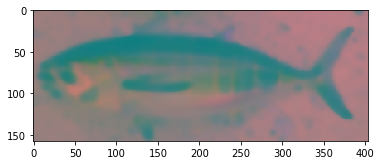

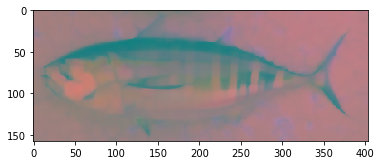

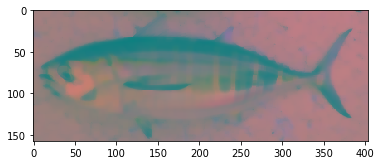

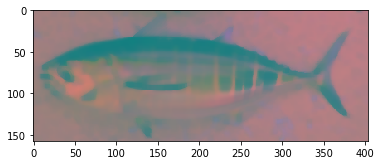

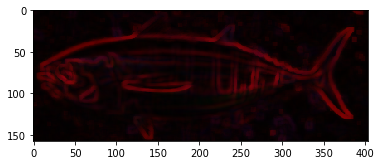

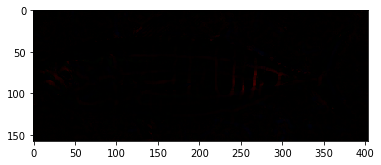

In [65]:
import matplotlib.pyplot as plt
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))

img = "/content/BETvsYFT/BET/1.PNG"
a = cv2.imread(img)
img_gray=cv2.cvtColor(a, cv2.COLOR_BGR2LAB)
r = cv2.bilateralFilter(img_gray ,9,75,75)
plt.figure()
plt.imshow(r)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(r,kernel,iterations = 1)
plt.imshow(cv2.bilateralFilter(erosion ,9,75,75))
dilation = cv2.dilate(r,kernel,iterations = 1)
plt.figure()
plt.imshow(dilation)
opening = cv2.morphologyEx(r, cv2.MORPH_OPEN, kernel)
plt.figure()
plt.imshow(opening)
closing = cv2.morphologyEx(r, cv2.MORPH_CLOSE, kernel)
plt.figure()
plt.imshow(closing)
gradient = cv2.morphologyEx(r, cv2.MORPH_GRADIENT, kernel)
plt.figure()
plt.imshow(gradient)
tophat = cv2.morphologyEx(r, cv2.MORPH_TOPHAT, kernel)
plt.figure()
plt.imshow(tophat)

plt.show()
#cc = process(a)
#print(cc)

In [0]:
test_connected_components=[process(img)  for img in test_images]

In [7]:
def rle_encoding(cc):
    values=list(np.unique(cc))
    values.remove(0)
    RLEs=[]
    for v in values:
        dots = np.where(cc.T.flatten() == v)[0]
        run_lengths = []
        prev = -2
        for b in dots:
            if (b>prev+1):
                run_lengths.extend((b + 1, 0))
            run_lengths[-1] += 1
            prev = b
        RLEs.append(run_lengths)
    return RLEs

test_RLEs=[rle_encoding(cc) for cc in test_connected_components]

NameError: ignored

In [6]:
with open("test.txt", "a") as myfile:
    myfile.write("ImageId,EncodedPixels\n")
    for i,RLEs in enumerate(test_RLEs):
        for RLE in RLEs:
            myfile.write(test_dirs[i]+","+" ".join([str(i) for i in RLE])+"\n")

NameError: ignored